**Предобработка данных**

#### Цель работы

Познакомиться с основными задачами и приемами предварительного анализа и обработки данных для целей машинного обучения

Предварительная обработка данных является неотъемлемым этапом машинного обучения, поскольку качество данных и полезная информация, которую можно извлечь из них, напрямую влияют на способность нашей модели к обучению; поэтому чрезвычайно важно, чтобы мы предварительно обработали наши данные, прежде чем вводить их в нашу модель. 

#### Содержание работы

1. Загрузите данные о пассажирах Титаника и познакомьтесь со структурой датасета.
1. Проведите анализ и визуализацию каждого признака датасета. Сделайте вывод о виде распределения и шкале каждого признака.
1. Проанализируйте влияние каждого признака на целевую переменную. Проиллюстрируйте ее графиками.
1. Исследуйте и исправьте при необходимости пропущенные значения в датасете.
1. Преобразуйте категориальные признаки в численные самым подходящим способом.

#### Методические указания

##### Подготовка и загрузка данных

Для полноценной работы с регрессионным анализом данных нам потребуются следующие библиотеки языка Python:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

Для начала считаем данные из csv-файла:

In [2]:
training_set = pd.read_csv('titanic.csv')
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Результат работы функции - предпросмотр загруженных данных. Рассмотрим внимательнее, что содержится в данном датасете. Ниже представлена краткая информация о каждом из столбцов датасета:

**PassengerId**: Уникальный индекс/номер строки. Начинается с 1 (для первой строки) и увеличивается на 1 для каждой следующей. Рассматриваем его как идентификатор строки и, что логично, идентификатор пассажира (т.к. для каждого пассажира в датасете представлена только одна строка).

**Survived**: Признак, показывающий был ли спасен данный пассажир или нет. 1 означает, что удалось выжить, и 0 - не удалось спастись.

**Pclass**: Класс билета. 1 - означает Первый класс билета. 2 - означает Второй класс билета. 3 - означает Третий класс билета.

**Name**: Имя пассажира. Имя также может содержать титулы и обращения. "Mr" для мужчин. "Mrs" для женщин. "Miss" для девушек (тут имеется в виду что для тех, кто не замужем, так было принято, да и сейчас тоже, говорить в западном обществе). "Master" для юношей.

**Sex**: Пол пассажира. Либо мужчины (=Male) либо женщины (=Female).

**Age**: Возраст пассажира. "NaN" значения в этой колонке означают, что возраст данного пассажира отсутствует/неизвестен/или не был записан в датасет.

**SibSp**: Количество братьев/сестер или супругов, путешествующих с каждым пассажиром.

**Parch**: Количество родителей детей (Number of parents of children travelling with each passenger).

**Ticket**: Номер билета.

**Fare**: Сумма, которую заплатил пассажир за путешествие.

**Cabin**: Номер каюты пассажира. "NaN" значения в этой колонке указывает на то, что номер каюты данного пассажира не был записан.

**Embarked**: Порт отправления данного пассажира.

.describe() отобразит различные величины, такие как количество, среднее, среднеквадратичное отклонение и т.д. для численных типов данных.

Это может быть полезным для понимания распределения значений по датасету и статистики, особенно когда нет возможности просмотреть все записи в виду огромного их количества

In [3]:
training_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Очень часто во множестве данных будут присутствовать отсутствующие данные. Используем метод isnull. Результатом вызова данного метода является логическое значение, указывающее, действительно ли значение, переданное в аргумент, отсутствует. «Истина» ( True ) означает, что значение является отсутствующим значением, а «Ложь» ( False ) означает, что значение не является отсутствующим.

.describe(include = ['O']) отобразит статистики (descriptive statistics) объектного типа. Это нужно для нечисловых данных, когда нельзя просто посчитать максимумы/среднее/и пр. для данных. Мы можем отнести такие данные к категориальному виду

In [4]:
training_set.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Видно, что существуют дубликаты номеров билетов Ticket и переиспользуются каюты Cabins (уникальных записей (unique) меньше, чем общего количества). Самый большой порядок дубликата билета - "347082". Он повторился 7 раз. Аналогично, наибольшее число людей, занимающих одну и ту же каюту - 4. Они используют каюты "B96 B98".
Также можно заметить, что 644 человека отбыли из порта "S".
Среди 891 записей, 577 были мужчины (Male), оставшиеся - женщины (Female).

##### Описание каждого признака

Гистограмма распределения признаков:

In [7]:
def custom_hist(training_set, title,  xlabel, ylabel='Количество, чел', bins=None):
    figsize = (20,6)
    plt.figure(figsize=figsize)
    plt.grid(True)
    plt.title(title)
    plt.hist(training_set, int(training_set.max()) if bins is None else bins, color='#17becf')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

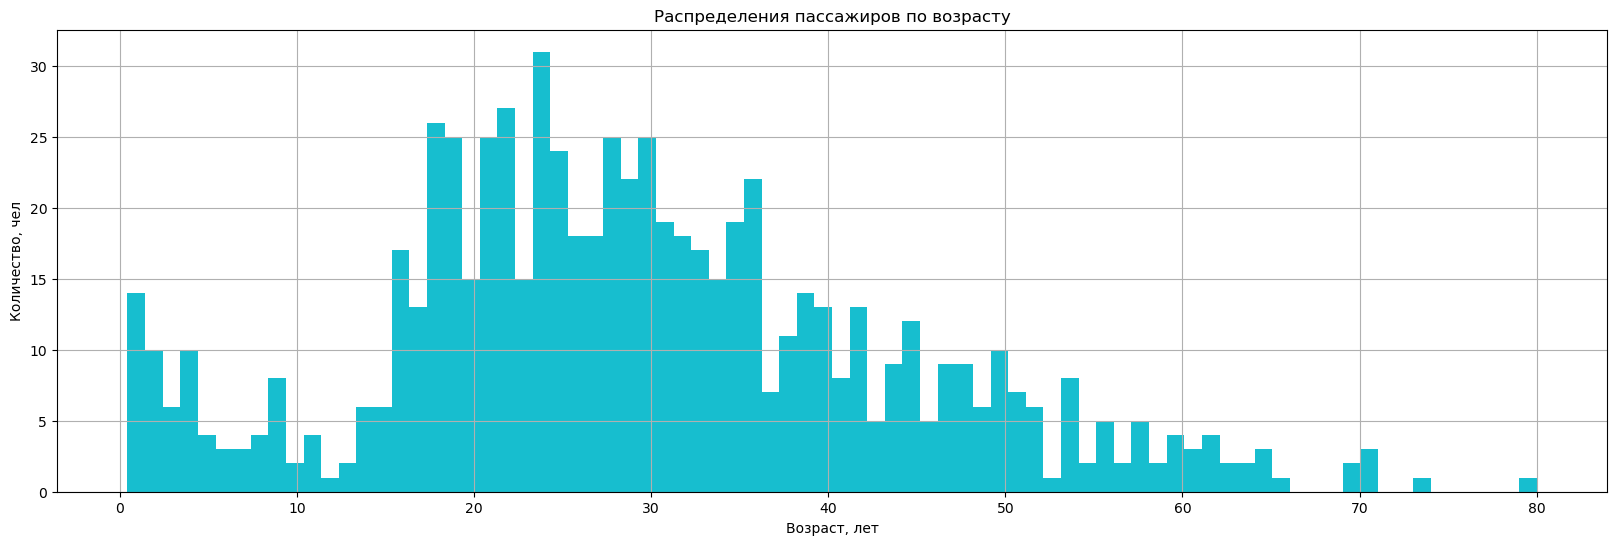

In [8]:
custom_hist(training_set["Age"], 'Распределения пассажиров по возрасту', 'Возраст, лет')

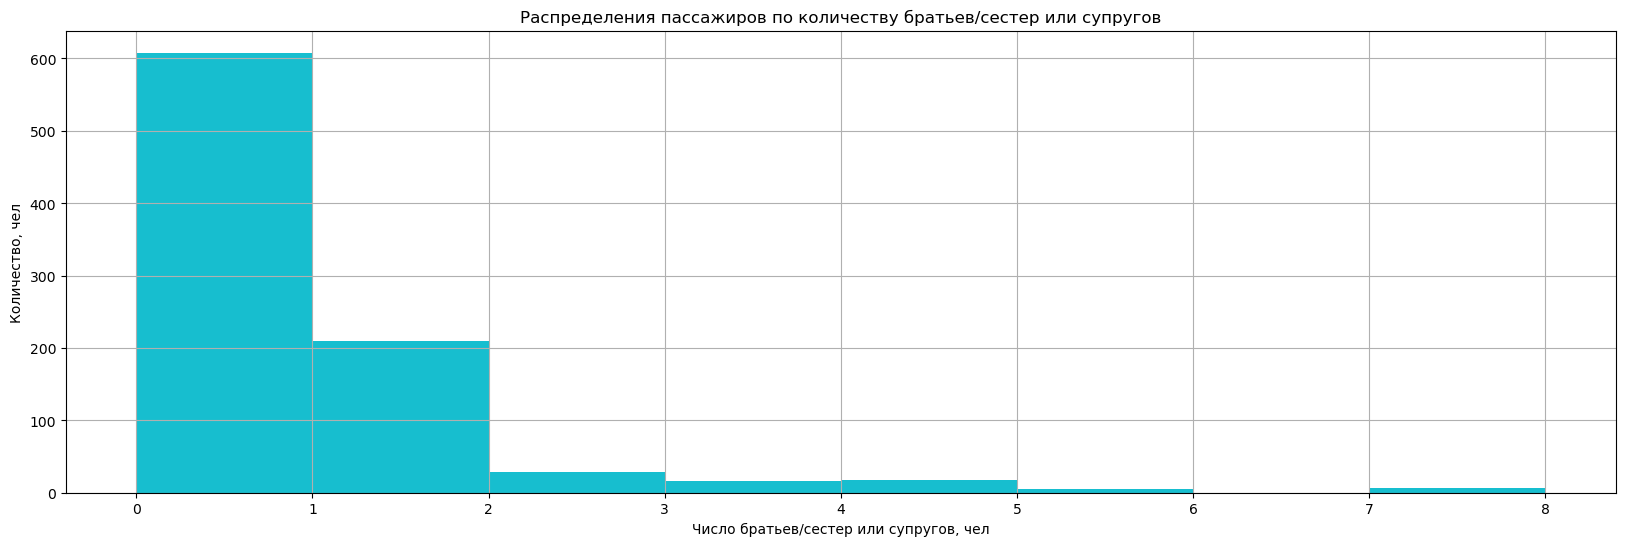

In [9]:
custom_hist(training_set["SibSp"], 'Распределения пассажиров по количеству братьев/сестер или супругов', 
  'Число братьев/сестер или супругов, чел')

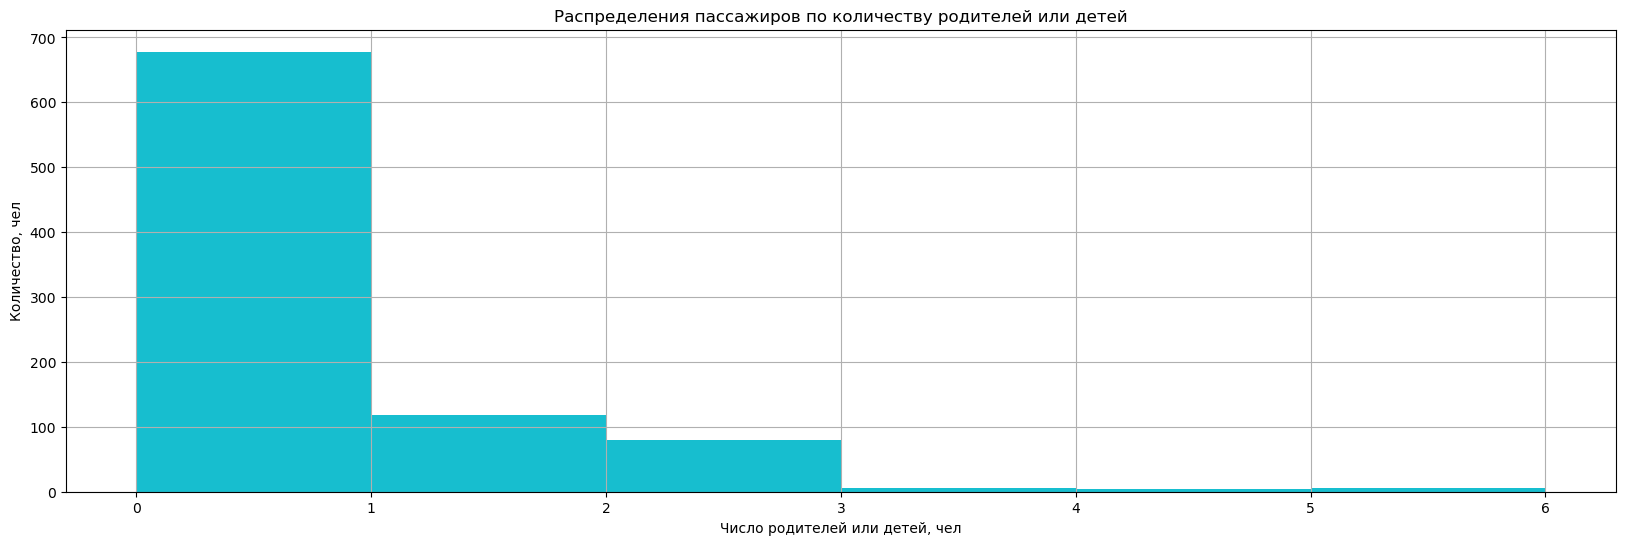

In [10]:
custom_hist(training_set["Parch"], 'Распределения пассажиров по количеству родителей или детей', 
  'Число родителей или детей, чел')

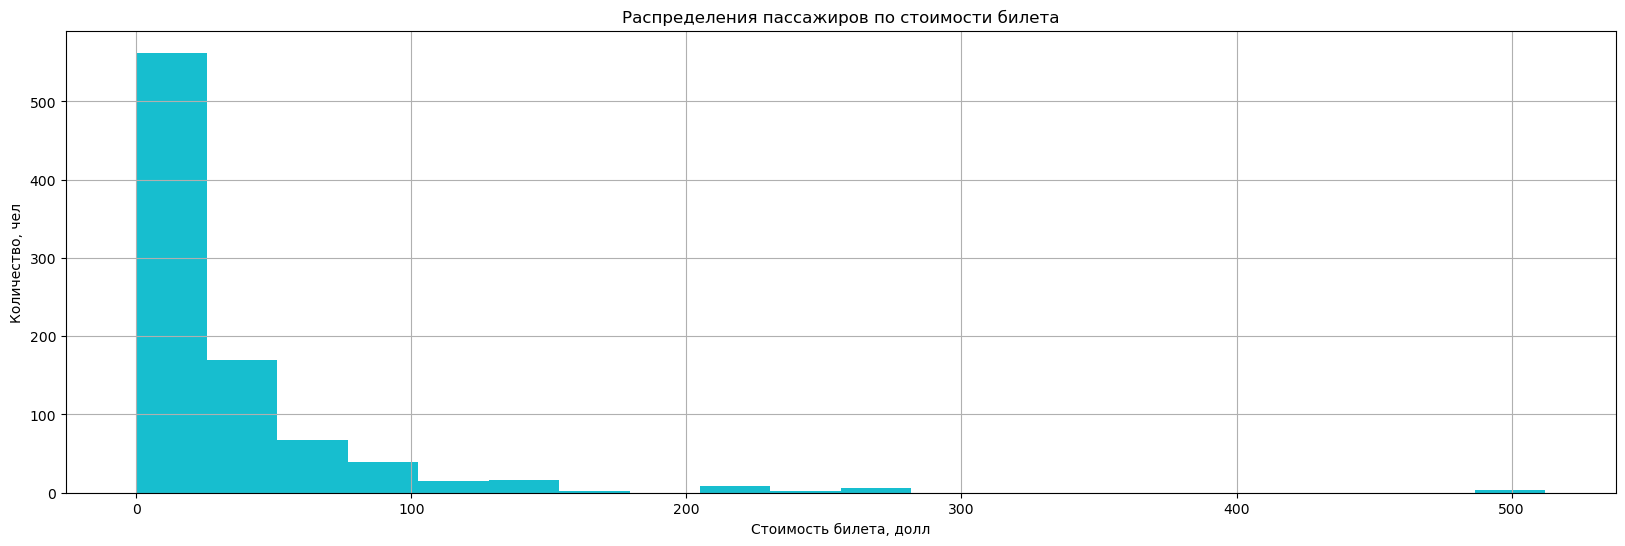

In [12]:
custom_hist(training_set["Fare"], 'Распределения пассажиров по стоимости билета', 
  'Стоимость билета, долл', bins=20)

Далее проанализируем возраст людей, это мы сделаем с помощью графика распределения. На графике мы видим, что средний возраст пассажиров составляет 20-35 лет.

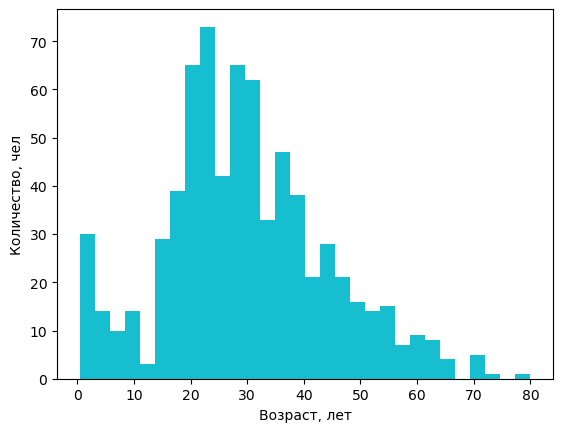

In [13]:
ax = training_set['Age'].plot.hist(bins=30, color='#17becf')
ax.set_xlabel('Возраст, лет')
ax.set_ylabel('Количество, чел')
plt.show()

Проведем исследования столбца SibSp и Parch, означающий сестра,братья/супруги и дети/родители. Из графика мы видим, что большинство не имело братьев и сестер, а так же супругов, следующий столбец -1- учитывает супругов.

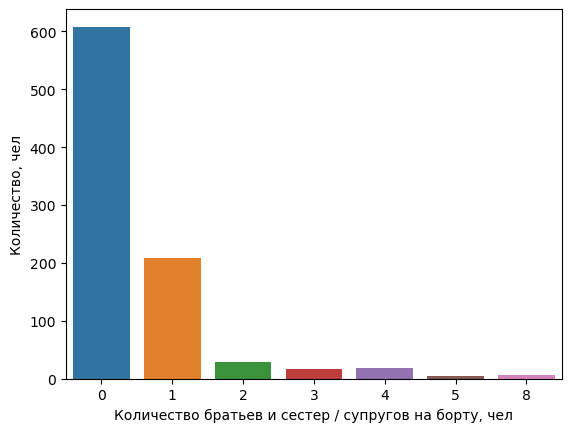

In [14]:
sns.countplot(x='SibSp', data=training_set)
plt.xlabel('Количество братьев и сестер / супругов на борту, чел')
plt.ylabel('Количество, чел')
plt.show()

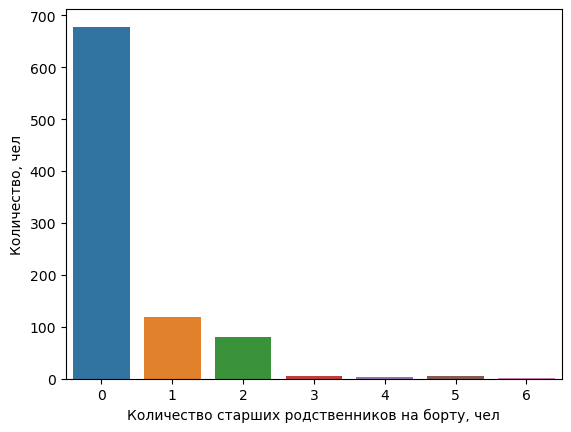

In [15]:
sns.countplot(x='Parch', data=training_set)
plt.xlabel('Количество старших родственников на борту, чел')
plt.ylabel('Количество, чел')
plt.show()

Следующий столбец который будем исследовать - Fare, обозначает сколько люди платили за билет. 

In [37]:
training_set['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

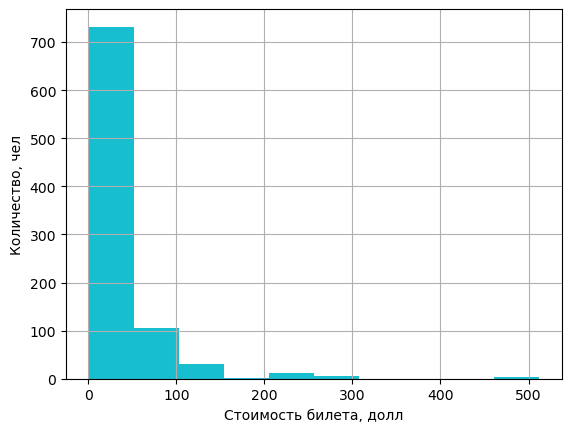

In [16]:
training_set['Fare'].hist(color='#17becf')
plt.xlabel('Стоимость билета, долл')
plt.ylabel('Количество, чел')
plt.show()

Из этого графика мы видим, что наибольшее распределение от 0 до 150, рассмотрим этот диапазон более подробно. Из графика мы видим, что наибольшее количество билетов были по цене до 50. Это действительно так, так как мы видим из данных, что большинство пассажиров было из третьего класса.

##### Описание вида совместного распределения

Установим соотношение выживших и не выживших

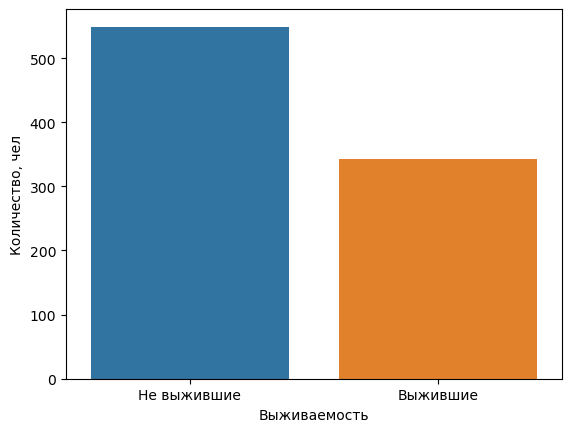

In [20]:
ax = sns.countplot(x='Survived', data=training_set)
ax.set_xticklabels(['Не выжившие', 'Выжившие'])

plt.xlabel('Выживаемость')
plt.ylabel('Количество, чел')
plt.show()

Отобразим пол выживших и не выживших. На графике мы видим, что среди не выживших большинство было мужчин, в выживших наоборот больше было женщин

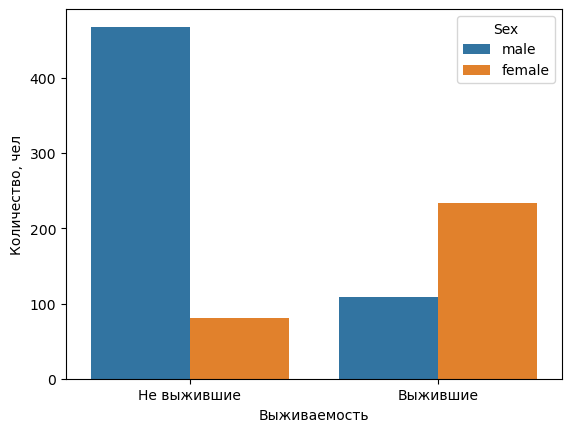

In [21]:
ax = sns.countplot(x='Survived', data=training_set, hue='Sex')
ax.set_xticklabels(['Не выжившие', 'Выжившие'])

plt.xlabel('Выживаемость')
plt.ylabel('Количество, чел')
plt.show()

В параметре hue мы можем использовать другой столбец, например класс пассажира  Pclass, и посмотреть как это соотносится с количеством выживших. Проанализировав полученный график, можно сказать, что из не выживших было больше людей третьего класса

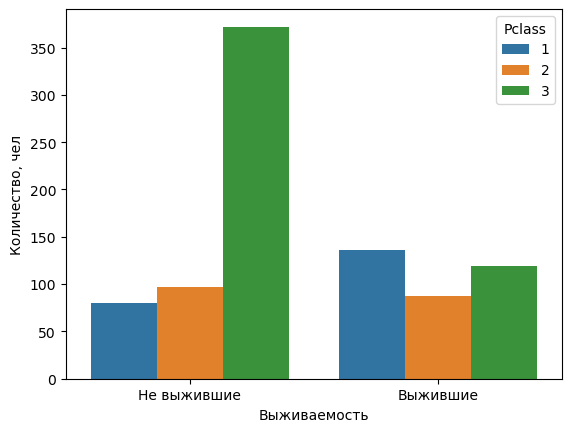

In [22]:
ax = sns.countplot(x='Survived', data=training_set, hue='Pclass')
ax.set_xticklabels(['Не выжившие', 'Выжившие'])

plt.xlabel('Выживаемость')
plt.ylabel('Количество, чел')
plt.show()

Создадим boxplot, передадим три параметра, класс пассажира, возраст, датасет. Из полученного графика можно сделать вывод, что средний возраст пассажиров первого класса больше чем средний возраст пассажиров второго класса, и соответственно средний возраст пассажиров второго класса больше чем средний возраст пассажиров третьего класса. Мы можем использовать эти среднии значения для того что бы вставлять эти значения там где они отсутствуют, основываясь на классе. 

<Axes: xlabel='Pclass', ylabel='Age'>

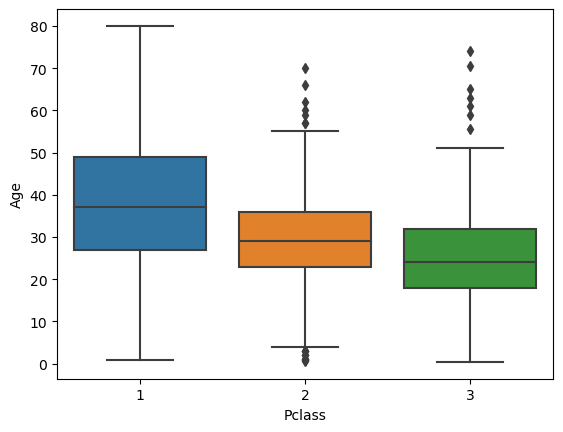

In [24]:
sns.boxplot(x='Pclass', y='Age', data=training_set)

В процессе анализа данных мы попробуем увидеть зависимости целевого признака от остальных признаков и остальных признаков между собой, чтобы избежать мультиколлинеарности и выбрать признаки, которые не имеют значения и которые стоит удалить.

Для признаков class, sex, sib_sp, par_ch, embarked визуализируем доли выживших для каждого значения признака:

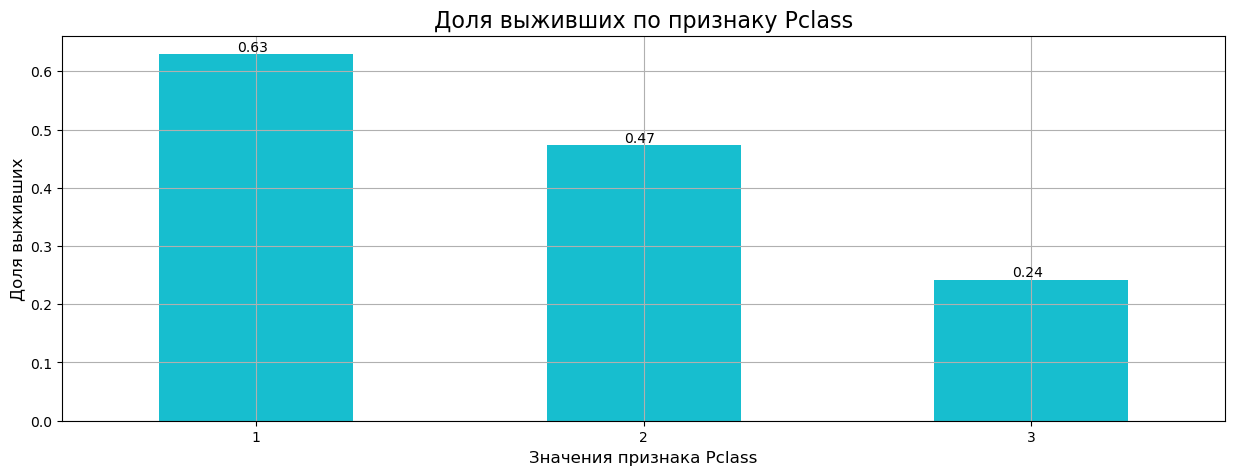

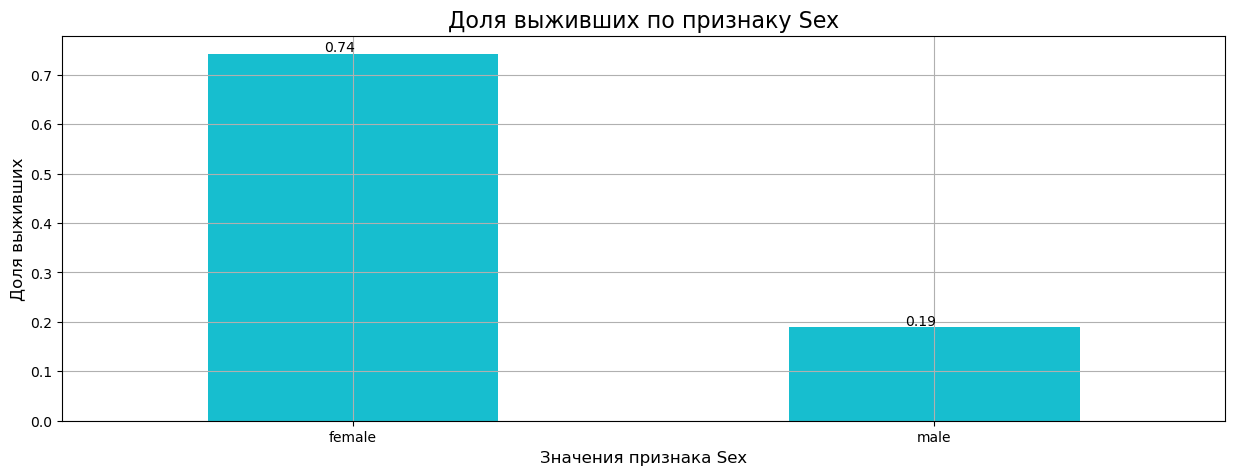

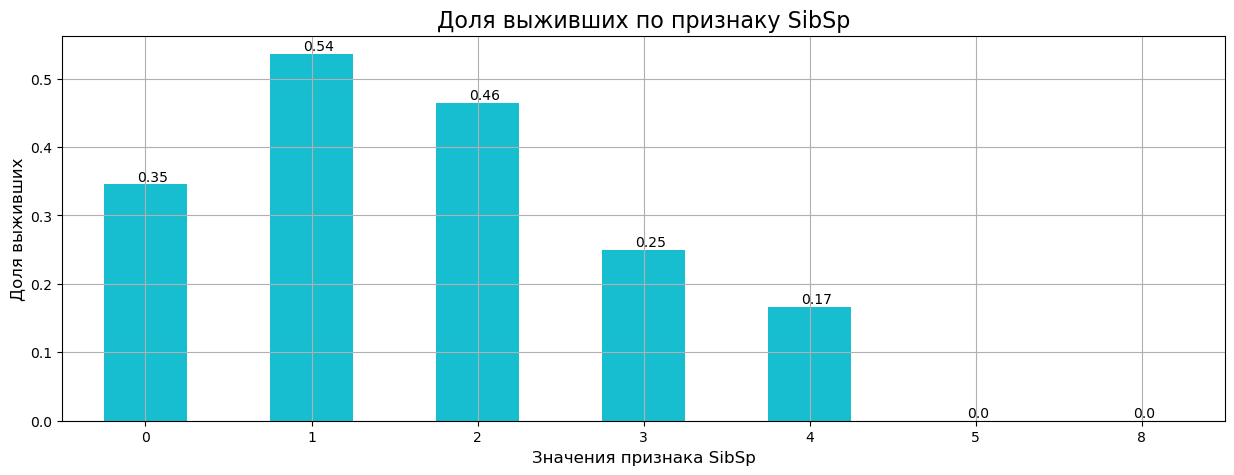

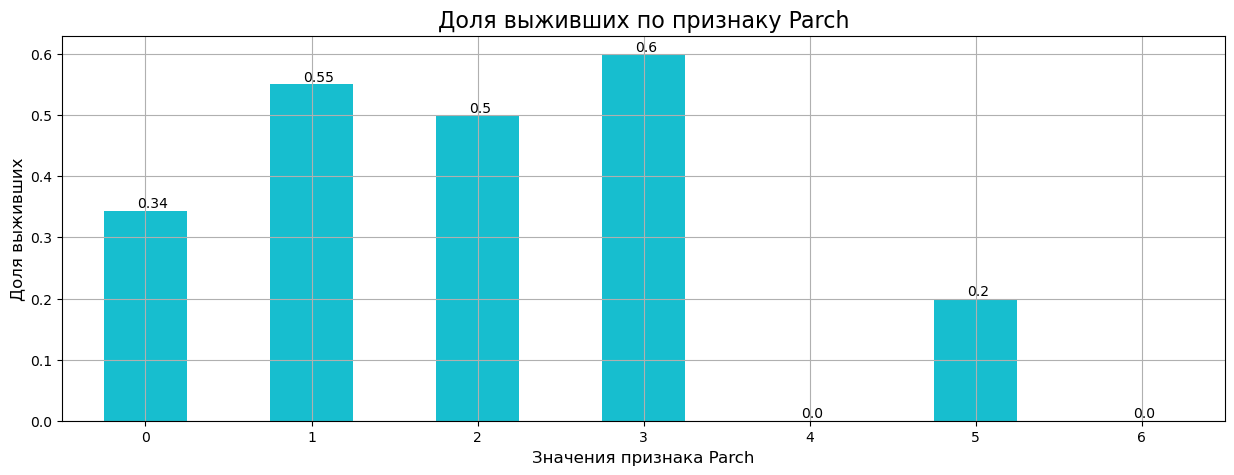

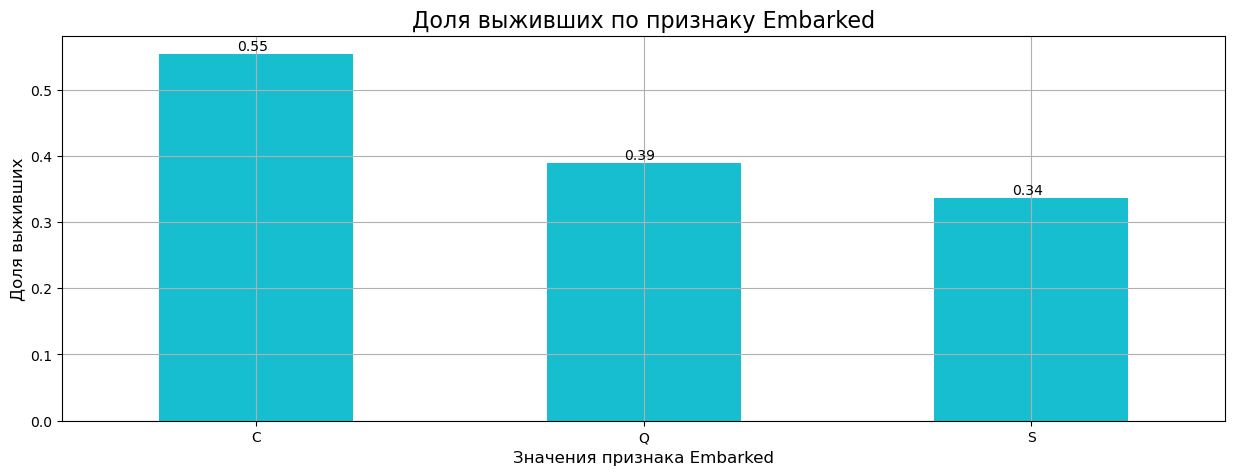

In [44]:
columns_to_look = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for column in columns_to_look:
    pivot = training_set.pivot_table(index=column, values='Survived', aggfunc='mean')
    
    fig, ax = plt.subplots(figsize=(15,5))
    ax.set_title(f'Доля выживших по признаку {column}', fontdict={'size': 16})
    ax.set_ylabel('Доля выживших', fontdict={'size': 12})
    ax.set_xlabel(column, fontdict={'size': 12})
    
    for cnt in range(pivot.shape[0]):
        value = pivot.iloc[cnt].values[0]
        ax.text(cnt - .05, value + .005, round(value, 2))
        
    pivot.plot(kind='bar', rot=0, grid=True, legend=False, ax=ax, color='#17becf') 
    ax.set_xlabel(f'Значения признака {column}', fontdict={'size': 12})
    plt.show()

Видим, что ни один из признаков не стоит убирать из таблицы, т.к. значения доли выживших сильно отличается. Разумеется, различия могуть быть вызваны случайностью, особенно на больших значениях признаков SibSp и Parch, т.к. объектов с такими значениями мало и доля выживших не очень информативна. Но удалить эти признаки мы всё-таки не можем, т.к. значения доли различны.

Видно, что особенно значимое влияние на значение целевого признака оказывает пол пассажира. Довольно значимым признаком так же является класс.

##### Исследование пропущенных значений

Используем метод .info(), чтобы увидеть больше информацию о типах данных/структуре в тренировочной выборке.

In [45]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Можно увидеть, что значение Age не задано для большого количества записей.
Из 891 строк, возраст Age задан лишь для 714 записей.
Аналогично, номер каюты "Cabin" также пропущены для большого количества записей. Только 204 из 891 записей содержат значения Cabin.

In [46]:
training_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Всего 177 записей с пропущенным возрастом (Age), 687 записей с пропущенным значение каюты Cabin и для 2 записей не заданы порты отправления Embarked.

##### Исследование отсутствующих значений

Приступим к исследованию отсутствующих значений.

При вызове метода isnull получаем таблицу с булевыми значениями, False - присутствуют данные, True - данные отсутствуют

In [47]:
training_set.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


Для визуализации представленых булевых значений воспользуемся Seaborn heatmap, с помощью чего сможем увидеть где больше всего отсутствующих данных. Желтый цвет нам говорит о пропущенных значениях. Наглядно видно, что много отсутствующих данных в столбце Age и Cabin.  

<Axes: >

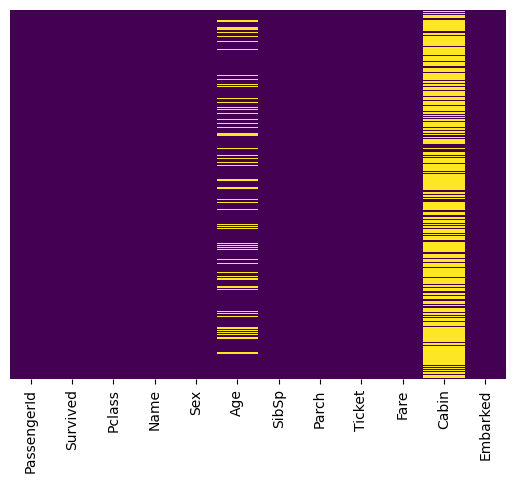

In [48]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Проверим имеются ли значения null, запустив следующий код

<Axes: >

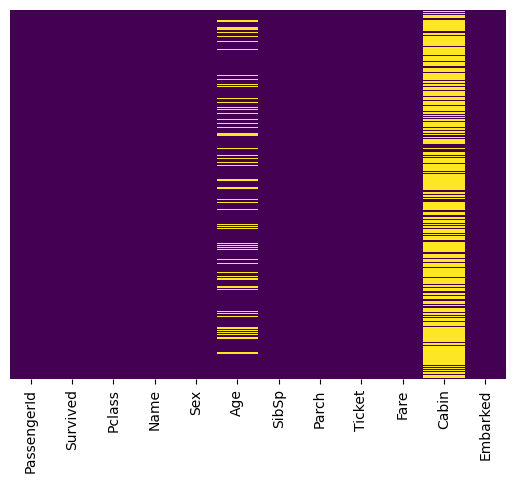

In [49]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Осталось большое количество отсутствующих данных в столбце Cabin (Каюты), если бы мы использовали этот столбец для анализа, то тогда можно было бы применить способ что бы предугадать пропущеные значения, но столбец нам не нужен, поэтому мы можем его просто отбросить, при помощи кода представленного ниже 

In [50]:
training_set.drop('Cabin', axis=1, inplace=True)

In [51]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

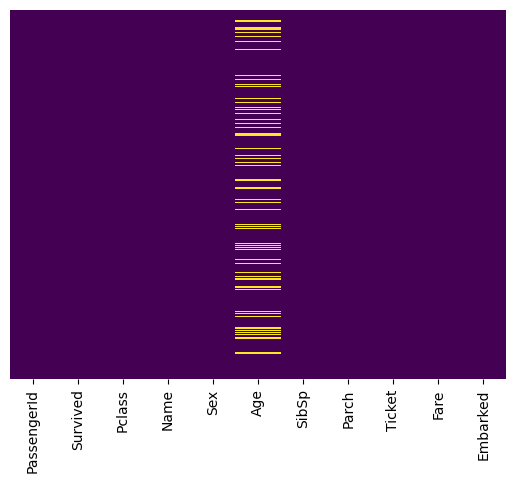

In [52]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Мы видим что осталось одно отсутствующее значение и мы можем легко от него избавиться, код ниже удаляет строки с отсутствующими значениями 

In [53]:
training_set.dropna(inplace=True)

Перезапустим код и видим что мы не имеем отсутствующих значений. Таким образом мы совершили первый шаг очистки данных, мы очистили наши данные от отсутствующих данных, какие то отсутствующие данные мы заполнили средними значениями, а некоторые просто удалили. 

In [54]:
training_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


##### Преобразование категориальных признаков

Далее мы будем работать с категориальными характеристиками. Нам необходимо конвертировать категориальные характеристики в численные, так как большинство моделей машинного обучения не может работать с текстовыми данными как входными. 

Рассмотрим столбец Sex(пол). Мы видим категории male и female, алгоритм машинного не может принимать строку, т.е. мы должны создать еще один столбец в котором будут нули и единицы, т.е. мы должны закодировать эти категории, чтобы алгоритм машинного обучения мог их понять. Это называется создание фиктивной переменной. И то же самое мы сделаем для столбца Embarked (порт прибытия), так как в этом столбце буквы которые представляют города.

Рассмотрим кодирование категорий целочисленными значениями (label encoding). В этом случае уникальные значения категориального признака кодируются целыми числами. Кодирование категорий целочисленными значениями - LabelEncoder, предполагается что значения категорий заменяются целыми числами в случайном порядке

In [55]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

le = LabelEncoder()
cat_enc_le = le.fit_transform(training_set['Sex'])

Выведем уникальные значения данного признака:

In [56]:
training_set['Sex'].unique()

array(['male', 'female'], dtype=object)

In [57]:
np.unique(cat_enc_le)  

array([0, 1])

In [58]:
le.inverse_transform([0,1])

array(['female', 'male'], dtype=object)

В зависимости от данных это преобразование может создать новую проблему. Мы перевели набор стран в набор чисел. Но это всего лишь категориальные данные, и между числами на самом деле нет никакой связи. Проблема здесь в том, что, поскольку разные числа в одном столбце, модель неправильно подумает, что данные находятся в каком-то особом порядке — 0 < 1 < 2 Хотя это, конечно, совсем не так. 

Поэтому LabelEncoder можно применять с осторожностью. По этому принципу можно преобразовывать бинарные переменные (такие как пол) или переменные, измеренные по ординальной шкале. Но ординальные переменные надо преобразовывать не в случайном порядке, а в строго определенном, в естественном порядке.

Для решения проблемы мы используем OneHotEncoder. Этот кодировщик берёт столбец с категориальными данными, который был предварительно закодирован в признак, и создаёт для него несколько новых столбцов. Числа заменяются на единицы и нули, в зависимости от того, какому столбцу какое значение присуще.

In [59]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(training_set[['Embarked']])  # Вызываем метод fit_transform, возвращает разреженную матрицу из библиотеки Scipy 

Изначальная форма датасета:

In [60]:
training_set.shape

(712, 11)

Форма датасета после изменения:

In [61]:
cat_enc_ohe.shape

(712, 3)

То же самое преобразование можно сделать при помощи встроенного в pandas метода get_dummies(). 

Вызовем метод get_dummies передаем столбец Sex, данный метод конвертирует категориальные переменные в фиктивные переменные, так же они известные как переменные-индикаторы.

In [62]:
pd.get_dummies(training_set['Sex'])

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
885,True,False
886,False,True
887,True,False
889,False,True


Получаем такой результат, т.е. у нас два столбца и 0 и 1 в качестве значений, можно расценивать как булевы значения, 0 это False, 1 это True. Первая строка говорит нам о том что male = 1 означает что человек был мужского пола. 

Но мы получаем проблему: один столбец идеально предсказывает второй столбец, т.е. если мы зададим такие входные данные в алгоритм машинного обучения, то он поймет что в случае если в одном столбце ноль в другом обязательно будет 1. Эта проблема называется мультиколлинеарностью. Это запутывает алгоритм. Решением будет удаление одного столбца. 

In [63]:
pd.get_dummies(training_set['Sex'], drop_first=True)

,male
0,True
1,False
2,False
3,False
4,True
...,...
885,False
886,True
887,False
889,True


In [64]:
sex = pd.get_dummies(training_set['Sex'], drop_first=True)

In [65]:
embark = pd.get_dummies(training_set['Embarked'], drop_first=True)
embark

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
885,True,False
886,False,True
887,False,True
889,False,False


У нас было три значения S,C,Q по названиям портов отправки, мы отбросили C у нас осталось два столбца, но они не являются предсказателями друг для друга.

Добавим вновь созданные столбцы sex, embark в наше множество данных при помощи метода pd.concat мы добавляем список указываем training_set и добавляем столбцы sex, embark и указываем еще один параметр axis=1 что бы указать что это будут столбцы. Мы видим что у нас остались старые столбцы но так же добавились и новые:

In [66]:
training_set = pd.concat([training_set, sex, embark], axis=1)
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True


Удаляем ненужные столбцы:

In [67]:
training_set.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
training_set.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


Таким образом мы получили итоговый набор данных, подготовленный к машинному обучению. Это набор данных удовлетворяет всем условиям чистых данных, и при этом содержит всю информацию из первоначального датасета. 

#### Задания для самостоятельного выполнения

1. Постройте по получившемуся набору данных простую модель машинного обучения и оцените ее эффективность.
2. Ответьте на следующие вопросы при помощи визуализации и численных данных по исходному набору данных:
    1. Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших? 
    2. Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?
    3. Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.
    4. Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение диаграммы рассеяния).
    5. Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?
    6. Какова связь между стоимостью билета и портом отправления? Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне. 
    7. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.
3. Оцените репрезентативность представленной выборки. Сколько всего было пассажиров Титаника? Сколько из них выжило? Какую долю составляет представленный набор данных от всей генеральной совокупности?
4. Разделите выборку на тестовую и обучающую части при помощи train_test_split(). Изобразите на графиках распределение некоторых атрибутов и целевой переменной. Насколько однородно получившееся разбиение?
5. Сбалансируйте классы в исходном датасете двумя способами:
    1. Удалите лишние объекты мажоритарного класса (выбранные случайно)
    2. Добавьте в выборку дубликаты миноритарного класса.
    3. Проведите исследование эффективности простой модели классификации до и после данных преобразований.
6. Постройте корреляционную матрицу признаков после преобразования данных. Сделайте вывод о наличии либо отсутствии мультиколлинеарности признаков.
7. Проведите группировку данных по значению возраста. Введите новый признак "возрастная категория", значениями которой будут "ребенок", "взрослый", "старик". Проведите анализ эффективности данного признака.


#### Построим простую модель обучения:

In [68]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(max_iter=500)

y = training_set.Survived
X = training_set.drop(["Survived"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

logistic.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [69]:
print("Coefficients: \n", logistic.coef_[0])

Coefficients: 
 [-9.62429876e-01 -3.41093760e-02 -3.07470353e-01 -1.61522217e-01
  2.21510620e-03 -2.51487260e+00 -9.25088826e-01 -3.82606588e-01]


In [70]:
y_pred = logistic.predict(X_test)
_ = [print(a, b) for a, b in list(zip(y_test, y_pred))[:10]]

0 0
1 1
0 0
0 0
1 0
0 0
0 0
1 1
1 1
0 0


In [71]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[69,  9],
       [16, 49]], dtype=int64)

In [72]:
logistic.score(X_test, y_test)

0.8251748251748252

Accuracy модели имеет достаточно высокое значение, но можно попробовать оптимизировать модель и обучить её на меньшем количестве признаков.

#### Посмотрим на графиках долю выживших после крушения.

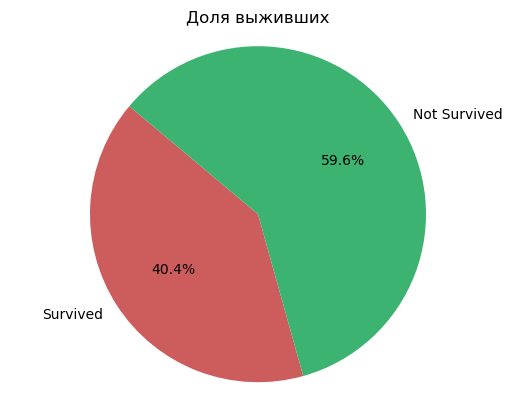

In [73]:
not_survived = (training_set['Survived'] == 0).sum()
survived = (training_set['Survived'] == 1).sum()
labels = 'Survived', 'Not Survived'
sizes = [survived, not_survived]
colors = ['IndianRed', 'MediumSeaGreen']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Доля выживших')
plt.show()

#### Оценим долю мужчин и женщин среди выживших:

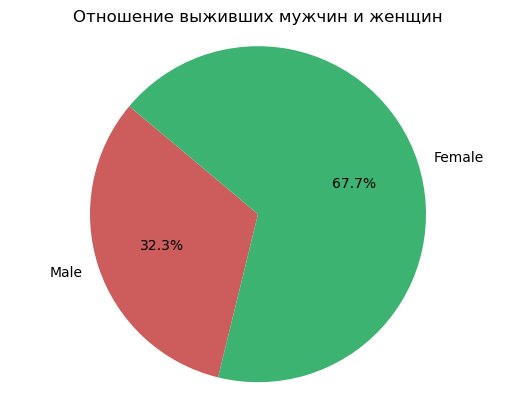

In [74]:
survived = training_set
survived = survived[training_set['Survived'] == 1]
male_survived = (survived['male'] == True).sum()
female_survived = (survived['male'] == False).sum()
labels = 'Male', 'Female'
sizes = [male_survived, female_survived]
colors = ['IndianRed', 'MediumSeaGreen']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Отношение выживших мужчин и женщин')
plt.show()

#### Оценим количество пассажиров в каждом классе:

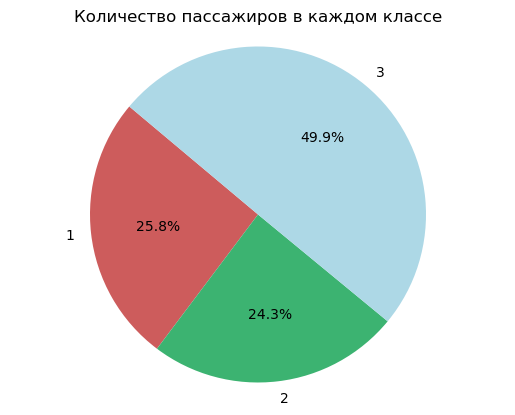

In [75]:
temp = training_set
P1 = temp[training_set['Pclass'] == 1]
P2 = temp[training_set['Pclass'] == 2]
P3 = temp[training_set['Pclass'] == 3]

labels = '1', '2', '3'
sizes = [len(P1), len(P2), len(P3)]
colors = ['IndianRed', 'MediumSeaGreen', 'lightblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Количество пассажиров в каждом классе')
plt.show()

3 класс - самый многолюдный. Посмотрим, какое отношение мужчин и женщин в этом классе:

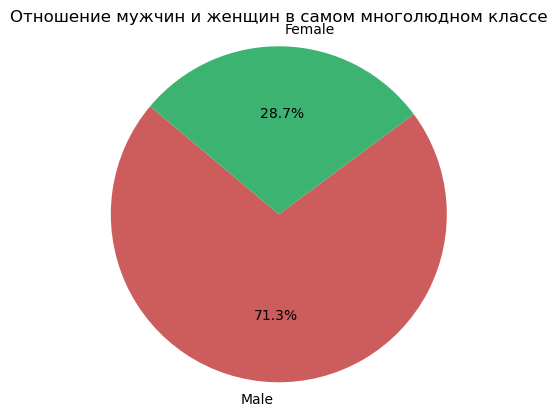

In [76]:
male = (P3['male'] == True).sum()
female = (P3['male'] == False).sum()
labels = 'Male', 'Female'
sizes = [male, female]
colors = ['IndianRed', 'MediumSeaGreen']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Отношение мужчин и женщин в самом многолюдном классе')
plt.show()

#### Рассмотрим, какие признаки несут в себе важную информацию: 

In [79]:
corr_m['Survived'].apply(lambda x: abs(x)).sort_values()

SibSp       0.015523
Q           0.048966
Age         0.082446
Parch       0.095265
S           0.159015
Fare        0.266100
Pclass      0.356462
male        0.536762
Survived    1.000000
Name: Survived, dtype: float64

Можем заметить, что наличие братьев/сестер/супруга и отбытие из порта Q не являются важными признаками при оценке выживших после крушения.

#### Оценим корреляцию признаков между собой:

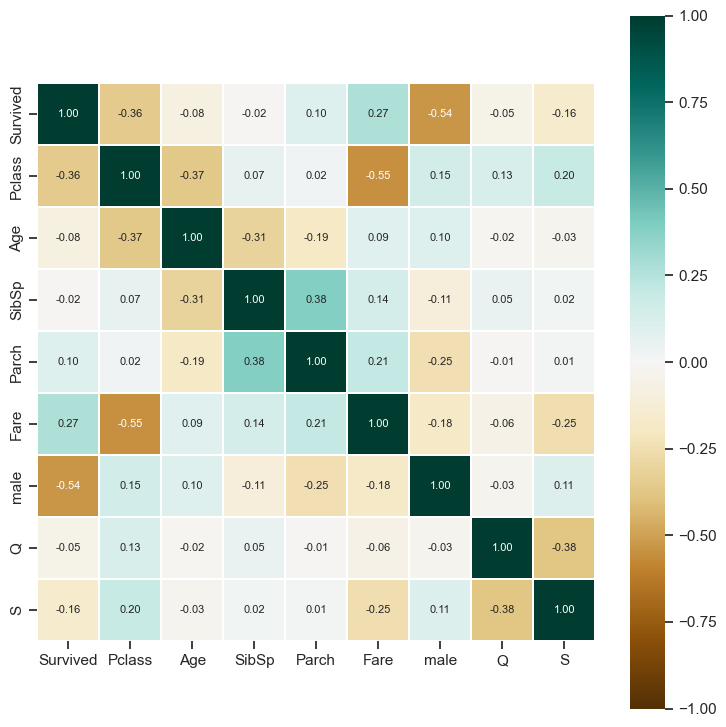

In [118]:
plt.figure(figsize=(9,9), dpi=100)
corr_m = training_set.corr()

sns.heatmap(corr_m, vmin=-1, vmax=1, fmt='.2f',
            square=True, cmap="BrBG", linewidths=0.1, annot=True, annot_kws={"fontsize":8}) 

plt.show() 

Заметим, что наиболее коррелирующими между собой признаками из изначального набора данных будут:
   - Наличие братьев/сестер/супруга и наличие детей/родителей в поездке;
   - Количество выживших и стоимость билетов;
   - Стоимость билетов и наличие детей/родителей;
   - Класс билета и тип каюты.
   
Таким образом, мы видим, что отбросить цену за билет нельзя - есть сильная связь с другими признаками. Наличие братьев/сестер/супругов также нельзя отбросить из-за высокой корреляции с другими признаками. Отбытие из порта Q слабо коррелирует с другими признаками. Отбросим его:

In [80]:
num = training_set.copy()
num.drop('Q', axis=1, inplace=True)
num

,Survived,Pclass,Age,SibSp,Parch,Fare,male,S
0,0,3,22.0,1,0,7.2500,True,True
1,1,1,38.0,1,0,71.2833,False,False
2,1,3,26.0,0,0,7.9250,False,True
3,1,1,35.0,1,0,53.1000,False,True
4,0,3,35.0,0,0,8.0500,True,True
...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,False,False
886,0,2,27.0,0,0,13.0000,True,True
887,1,1,19.0,0,0,30.0000,False,True
889,1,1,26.0,0,0,30.0000,True,False


#### Посчитаем, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров с помощью диаграммы рассеяния.

**Коэффициент корреляции Пирсона (произведение-момент)** является мерой линейной зависимости между двумя признаками. Это отношение ковариации x и y к произведению их стандартных отклонений.
- Коэффициент корреляции Пирсона может принимать любое действительное значение в диапазоне −1 ≤ r ≤ 1.
- Максимальное значение r = 1 соответствует случаю, когда существует идеальная положительная линейная связь между x и y. Другими словами, большие значения x соответствуют большим значениям y и наоборот.
- Значение r > 0 указывает на положительную корреляцию между x и y.
- Значение r = 0 соответствует случаю, когда между x и y нет линейной зависимости.
- Значение r <0 указывает на отрицательную корреляцию между x и y.
- Минимальное значение r = −1 соответствует случаю, когда между x и y существует идеальная отрицательная линейная зависимость. Другими словами, большие значения x соответствуют меньшим значениям y и наоборот.

**Коэффициент корреляции Спирмена** между двумя признаками — это коэффициент корреляции Пирсона между их ранговыми значениями. Он рассчитывается так же, как коэффициент корреляции Пирсона, но учитывает их ранги, а не их значения.
- Оно может принимать вещественное значение в диапазоне −1 ≤ ρ ≤ 1.
- Его максимальное значение ρ = 1 соответствует случаю, когда между x и y имеется монотонно возрастающая функция. Другими словами, большие значения x соответствуют большим значениям y и наоборот.
- Его минимальное значение ρ = −1 соответствует случаю, когда между x и y имеется монотонно убывающая функция. Другими словами, большие значения x соответствуют меньшим значениям y и наоборот.

**Коэффициент корреляции Кендалла** сравнивает количество согласующихся и несогласованных пар данных. Этот коэффициент основан на разнице количества согласных и несогласных пар относительно количества пар x-y. Его часто обозначают греческой буквой тау (τ) и называют тау Кендалла.
- Оно может принимать вещественное значение в диапазоне −1 ≤ τ ≤ 1.
- Его максимальное значение τ = 1 соответствует случаю, когда ранги соответствующих значений x и y совпадают. Другими словами, все пары согласованы.
- Его минимальное значение τ = −1 соответствует случаю, когда рейтинги по x являются обратными рейтингам по y. Другими словами, все пары несогласны.

In [81]:
from scipy.stats import pearsonr, spearmanr, kendalltau

r = pearsonr(training_set['Fare'], training_set['Age'])
print('Pearson correlation:', r[0], 'p-value:', r[1])

r = spearmanr(training_set['Fare'], training_set['Age'])
print('Spearman correlation:', r[0], 'p-value:', r[1])

r = kendalltau(training_set['Fare'], training_set['Age'])
print('Kendall correlation:', r[0], 'p-value:', r[1])

Pearson correlation: 0.09314251789411519 p-value: 0.01290455340704146
Spearman correlation: 0.13063238993344248 p-value: 0.0004748303515795212
Kendall correlation: 0.09034417238783664 p-value: 0.0003880500055701514


Между данными нет линейной зависимости, следовательно, они не коррелируют между собой.

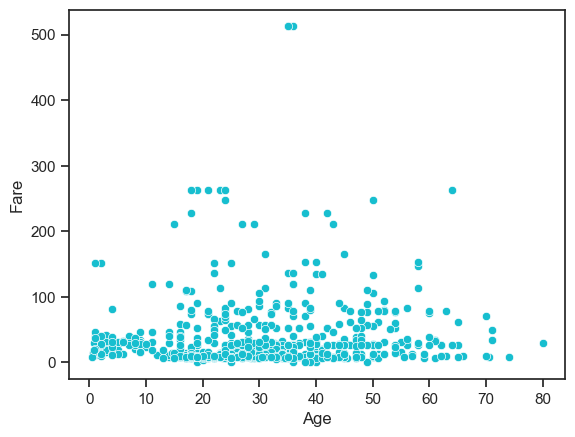

In [82]:
sns.set(style="ticks")
sns.scatterplot(data = training_set, x = "Age", y = "Fare", c='#17becf') 
plt.show() 

#### Посмотрим гистограмму отношения выживших к цене билета:

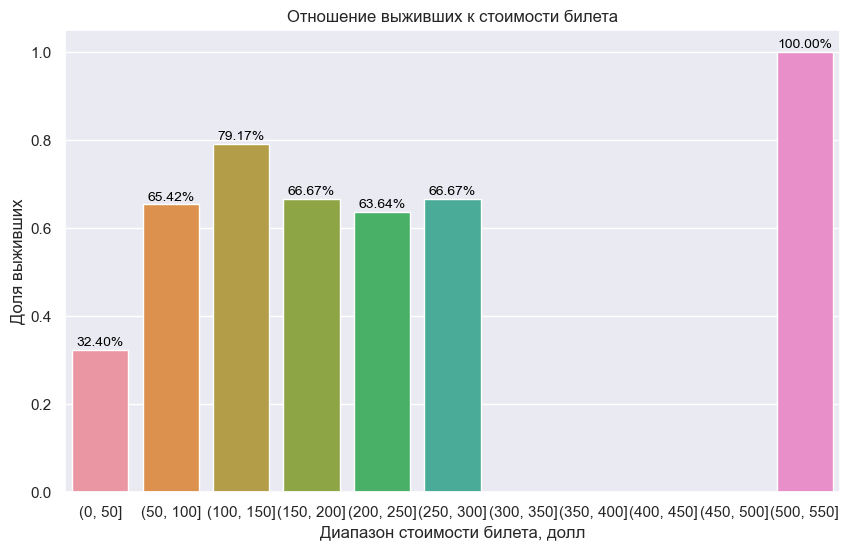

In [39]:
plt.figure(figsize=(10,6))
fare_bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550]
training_set['Fare_category'] = pd.cut(training_set['Fare'], bins=fare_bins)

ax = sns.barplot(x='Fare_category', y='Survived', data=training_set, errorbar=None)

for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Диапазон стоимости билета, долл')
plt.ylabel('Доля выживших')
plt.title('Отношение выживших к стоимости билета')
plt.show()

#### Стоит оценить зависимость выжимаемости от класса:

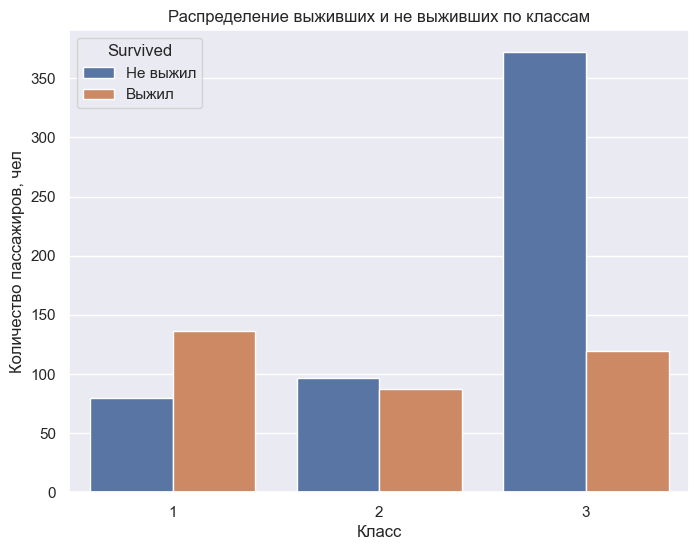

In [40]:
plt.figure(figsize=(8, 6)) 
sns.countplot(x='Pclass', hue='Survived', data=training_set)

plt.xlabel('Класс')
plt.ylabel('Количество пассажиров, чел')
plt.title('Распределение выживших и не выживших по классам')

plt.legend(title='Survived', labels=['Не выжил', 'Выжил'])
plt.show()

#### Найдем связь между стоимостью билета и портом отправления:

<Axes: xlabel='Embarked', ylabel='Fare'>

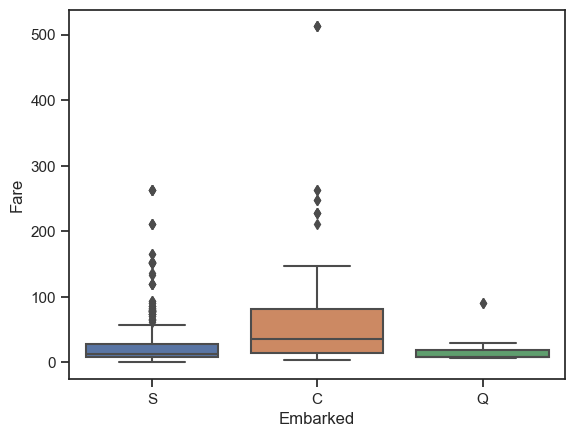

In [86]:
temp = pd.read_csv('titanic.csv')
temp.drop('Cabin', axis=1, inplace=True)
temp.dropna(inplace=True)
sns.boxplot(x='Embarked', y='Fare', data=temp)

Из диаграммы видно, что пассажиры с самыми дешевыми билетами отправлялись из порта Q, с самыми дорогими - из порта C.
Порт С включает в себя билеты любой категории, порт S - билеты стоимостью ниже среднего.

#### Выведем минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд:

In [87]:
training_set['Fare'].min(), training_set['Fare'].mean(), training_set['Fare'].max()

(0.0, 34.567251404494385, 512.3292)

#### Выведем то же самое для пассажиров, отправлявшихся из порта S:

In [88]:
temp = training_set.copy()
temp = temp[training_set['S'] == True]
temp['Fare'].min(), temp['Fare'].mean(), temp['Fare'].max()

(0.0, 27.476284476534296, 263.0)

#### Выведем гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

<Axes: xlabel='Embarked', ylabel='Fare'>

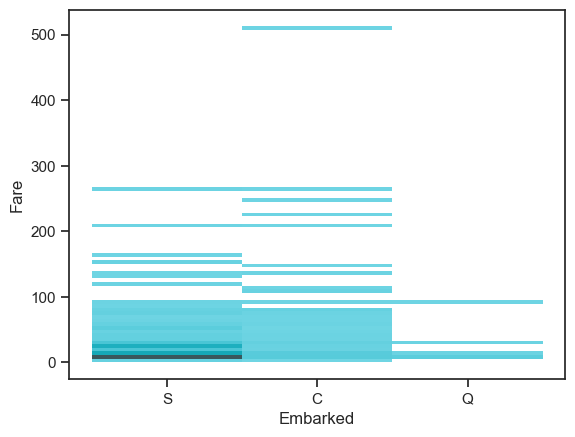

In [89]:
temp = pd.read_csv('titanic.csv')
temp.drop('Cabin', axis=1, inplace=True)
temp.dropna(inplace=True)

sns.histplot(data=temp, x='Embarked', y='Fare', color='#17becf')

#### Оценим репрезентативность выборки.

Всего пассажиров титаника:

In [90]:
training_set.shape[0]

712

Всего из них выжило:

In [91]:
survived = (training_set['Survived'] == 1).sum()
survived

288

Посчитаем, какую долю от генеральной выборки составляет этот набор данных:

In [92]:
df = pd.read_csv('titanic.csv')

print(f"{round(training_set.shape[0] / df.shape[0], 4) * 100} %")

79.91 %


#### Рассмотрим на графиках распределение атрибутов и целевой переменной для обучающего и тестового наборов.

In [93]:
def kde_plot(att):
    sns.kdeplot(X_train[f'{att}'], fill=True, color='blue', label=f'X_train {att}')
    sns.kdeplot(X_test[f'{att}'], fill=True, color='red', label=f'X_test {att}')

    plt.legend(prop={'size': 16}, title = f'X_train vs X_test', loc='upper left')
    plt.title(f'Density Plot with X_train vs X_test {att}')
    plt.xlabel(f'{att}')
    plt.ylabel('Density')
    plt.show()

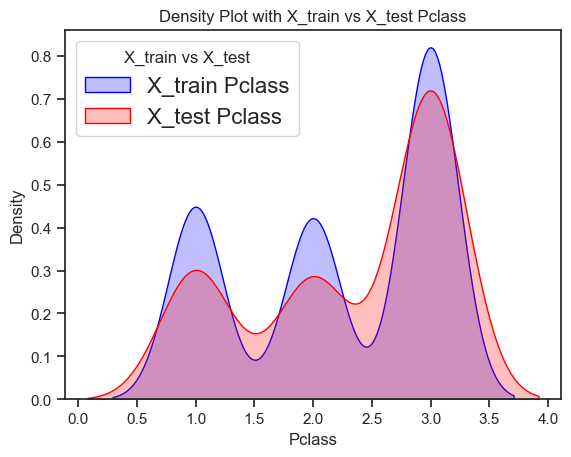

In [94]:
kde_plot(att='Pclass')

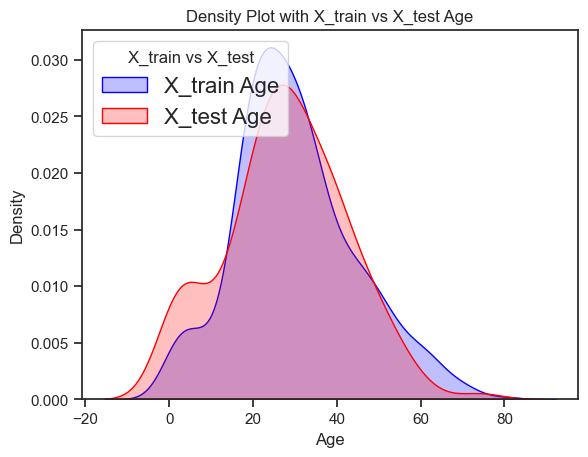

In [95]:
kde_plot(att='Age')

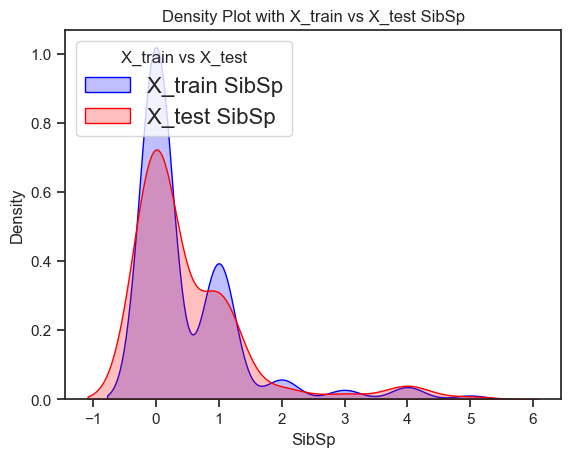

In [96]:
kde_plot(att='SibSp')

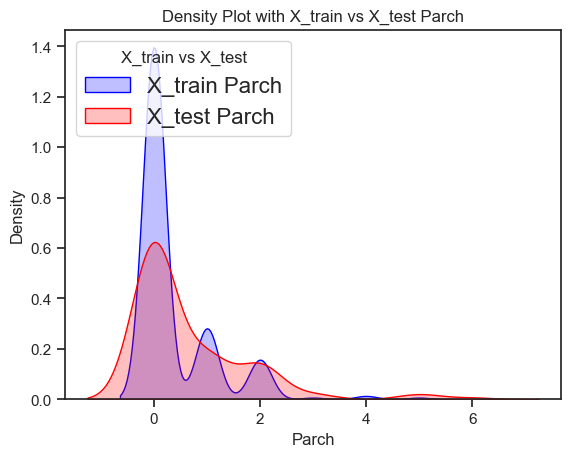

In [97]:
kde_plot(att='Parch')

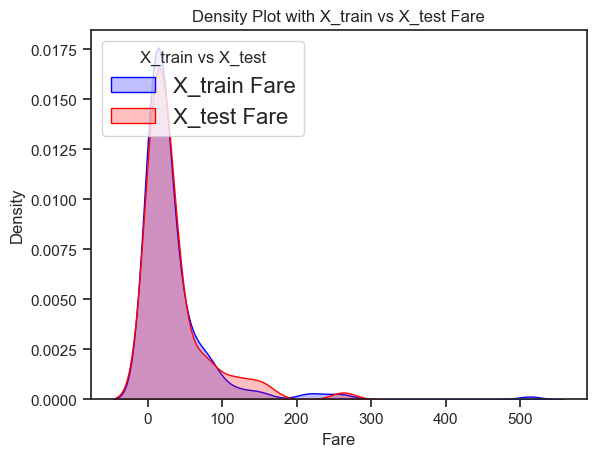

In [98]:
kde_plot(att='Fare')

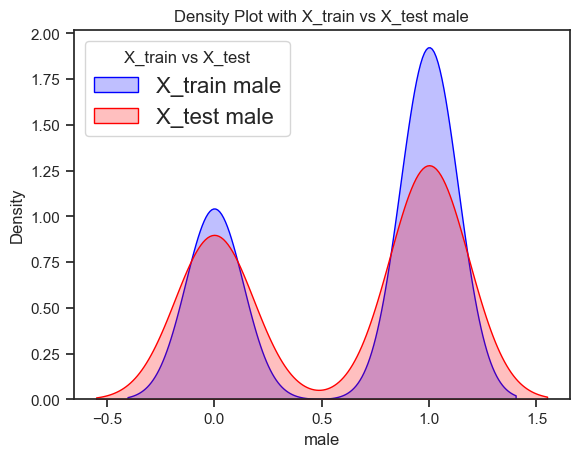

In [99]:
kde_plot(att='male')

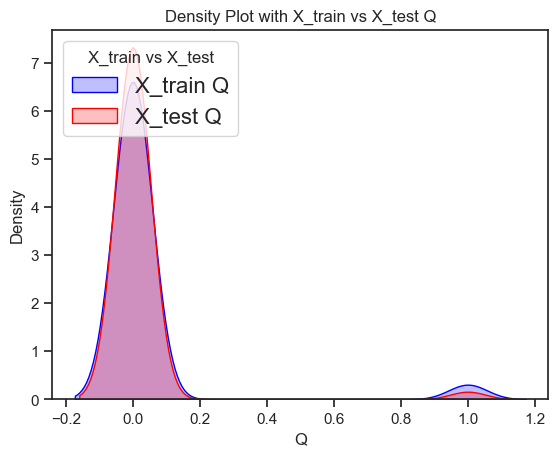

In [100]:
kde_plot(att='Q')

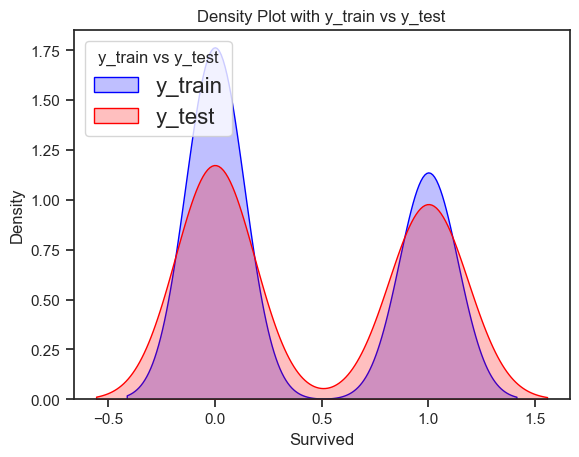

In [101]:
sns.kdeplot(y_train, fill=True, color='blue', label=f'y_train')
sns.kdeplot(y_test, fill=True, color='red', label=f'y_test')

plt.legend(prop={'size': 16}, title = f'y_train vs y_test', loc='upper left')
plt.title(f'Density Plot with y_train vs y_test')
plt.xlabel(f'Survived')
plt.ylabel('Density')
plt.show()

Исходя из графиков, можно утверждать, что распределение однородно. 

#### Сбалансируем классы в исходном датасете:

#### 1. Удалим лишние объекты мажоритарного класса (выбранные случайно):

Это самая простая и примитивная стратегия, но понятная и несложная в реализации. Сначала определяется число K примеров доминирующего класса, которое требуется удалить, чтобы достичь требуемого соотношения классов в обучающей выборке. Затем случайным образом выбираются K наблюдений доминирующего класса и удаляются.

In [102]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

print('Original dataset shape %s' % Counter(y))
rus = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 424, 1: 288})
Resampled dataset shape Counter({0: 288, 1: 288})


#### 2. Добавим в выборку дубликаты миноритарного класса:
    
Самый простой метод – это дублирование примеров миноритарного класса. В зависимости от того, какое соотношение классов необходимо получить в выборке, выбирается случайным образом соответствующее количество наблюдений для дублирования.

In [103]:
from imblearn.over_sampling import RandomOverSampler

print('Original dataset shape %s' % Counter(y))
ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_over, y_over = ros.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_over))

Original dataset shape Counter({0: 424, 1: 288})
Resampled dataset shape Counter({0: 424, 1: 424})


#### 3. Проведем исследование эффективности простой модели классификации до и после данных преобразований:

In [104]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

steps = [('under', RandomUnderSampler()), ('model', LogisticRegression(max_iter=500))]
pipeline = Pipeline(steps=steps)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_res, y_res, scoring='f1_micro', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score for Undersampling: %.3f' % score)

scores = cross_val_score(pipeline, X_over, y_over, scoring='f1_micro', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score for Oversampling: %.3f' % score)

F1 Score for Undersampling: 0.791
F1 Score for Oversampling: 0.788


In [105]:
from sklearn.metrics import accuracy_score, classification_report

X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
logistic_res = LogisticRegression(max_iter=500)
logistic_res.fit(X_train_res, y_train_res)
y_pred_res = logistic_res.predict(X_test_res)

X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.2, random_state=42)
logistic_over = LogisticRegression(max_iter=500)
logistic_over.fit(X_train_over, y_train_over)
y_pred_over = logistic_res.predict(X_test_over)

print("\nПроизводительность модели на несбалансированных данных:")
print(classification_report(y_test, y_pred))

print("\nПроизводительность модели на сбалансированных данных Undersampled:")
print(classification_report(y_test_res, y_pred_res))

print("\nПроизводительность модели на сбалансированных данных Oversampled:")
print(classification_report(y_test_over, y_pred_over))


Производительность модели на несбалансированных данных:
              precision    recall  f1-score   support

           0       0.81      0.88      0.85        78
           1       0.84      0.75      0.80        65

    accuracy                           0.83       143
   macro avg       0.83      0.82      0.82       143
weighted avg       0.83      0.83      0.82       143


Производительность модели на сбалансированных данных Undersampled:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83        63
           1       0.81      0.79      0.80        53

    accuracy                           0.82       116
   macro avg       0.82      0.82      0.82       116
weighted avg       0.82      0.82      0.82       116


Производительность модели на сбалансированных данных Oversampled:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        84
           1       0.77      0.84      0.80  

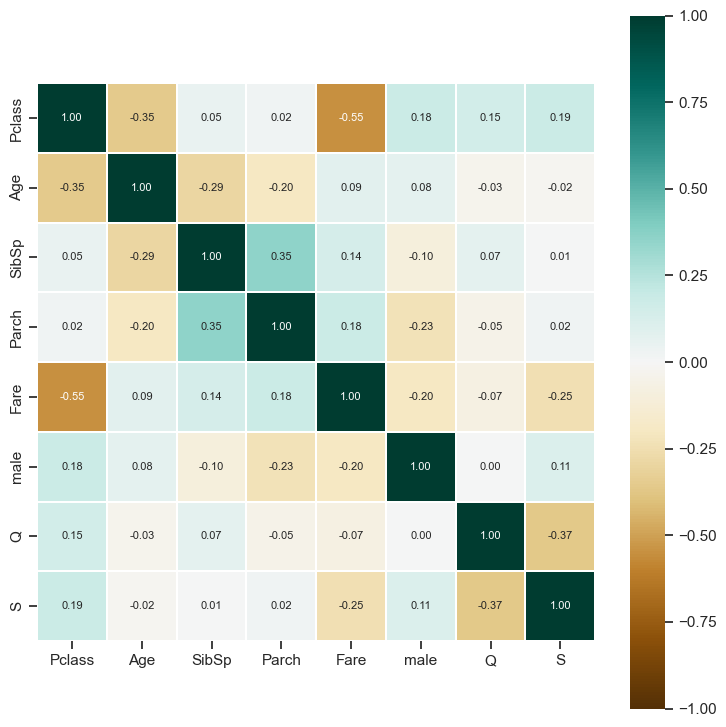

In [117]:
plt.figure(figsize=(9,9), dpi=100)
corr_m = X_res.corr()
sns.heatmap(corr_m, vmin=-1, vmax=1, fmt='.2f',
            square=True, cmap="BrBG", linewidths=0.1, annot=True, annot_kws={"fontsize":8}) 
plt.show() 

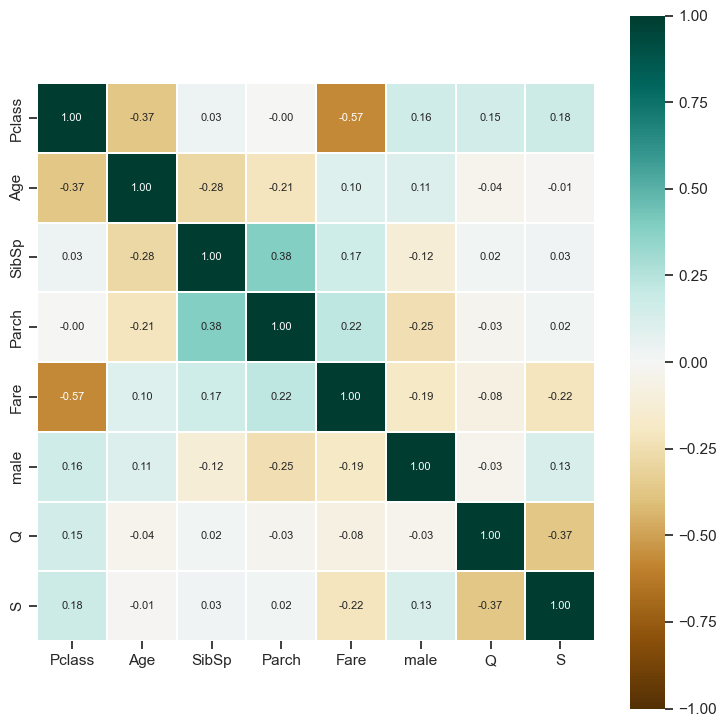

In [114]:
plt.figure(figsize=(9,9), dpi=100)
corr_m = X_over.corr()
sns.heatmap(corr_m, vmin=-1, vmax=1, fmt='.2f',
            square=True, cmap="BrBG", linewidths=0.1, annot=True, annot_kws={"fontsize":8}) 
plt.show() 

#### Вывод о наличии мультиколлинеарности признаков

- Признаки с положительным коэффициентом свидетельствуют о прямой линейной зависимости - с возрастанием значений одного признака растут значения другого;
- Признаки с отрицательным коэффициентом свидетельствуют об обратной линейной зависимости - с возрастанием значений одного признака уменьшаются значения другого.

В нашем случае:
1) С ростом класса (1 - самый высокий) - вырастает цена билета;
2) Чем выше класс, тем возрастнее в нём пассажиры;
3) При наличии братьев, сестер или супруга более вероятно быть в путешествии с родителями;
4) Чем выше возраст, тем маловероятнее путешествовать с братьями, сестрами, супругами или родителями;
5) Пассажиры, путешествующие с родителями, а также с братьями, сестрами или супругами с большей вероятностью путешествовали с более дорогими билетами;
6) Отправление из одного порта отрицает возможность отправления из другого.

#### Проведем группировку данных по значению возраста. Новый признак "возрастная категория", значениями которого будут "ребенок", "взрослый", "старик". 

In [108]:
def categorize_age(age):
    if age < 18:
        return "ребенок"
    elif age < 60:
        return "взрослый"
    else:
        return "старик"
    
data = training_set.copy()
data['Age Category'] = data['Age'].apply(categorize_age)
data.drop('Age', axis=1, inplace=True)
data.head(10)

,Survived,Pclass,SibSp,Parch,Fare,male,Q,S,Age Category
0,0,3,1,0,7.2500,True,False,True,взрослый
1,1,1,1,0,71.2833,False,False,False,взрослый
2,1,3,0,0,7.9250,False,False,True,взрослый
3,1,1,1,0,53.1000,False,False,True,взрослый
4,0,3,0,0,8.0500,True,False,True,взрослый
6,0,1,0,0,51.8625,True,False,True,взрослый
7,0,3,3,1,21.0750,True,False,True,ребенок
8,1,3,0,2,11.1333,False,False,True,взрослый
9,1,2,1,0,30.0708,False,False,False,ребенок
10,1,3,1,1,16.7000,False,False,True,ребенок


Проведем анализ эффективности данного признака:

In [109]:
age_category = pd.get_dummies(data['Age Category'])
data = pd.concat([data, age_category], axis=1)
data.drop('Age Category', axis=1, inplace=True)
data.head()

,Survived,Pclass,SibSp,Parch,Fare,male,Q,S,взрослый,ребенок,старик
0,0,3,1,0,7.2500,True,False,True,True,False,False
1,1,1,1,0,71.2833,False,False,False,True,False,False
2,1,3,0,0,7.9250,False,False,True,True,False,False
3,1,1,1,0,53.1000,False,False,True,True,False,False
4,0,3,0,0,8.0500,True,False,True,True,False,False



Производительность модели:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        78
           1       0.84      0.74      0.79        65

    accuracy                           0.82       143
   macro avg       0.82      0.81      0.81       143
weighted avg       0.82      0.82      0.82       143



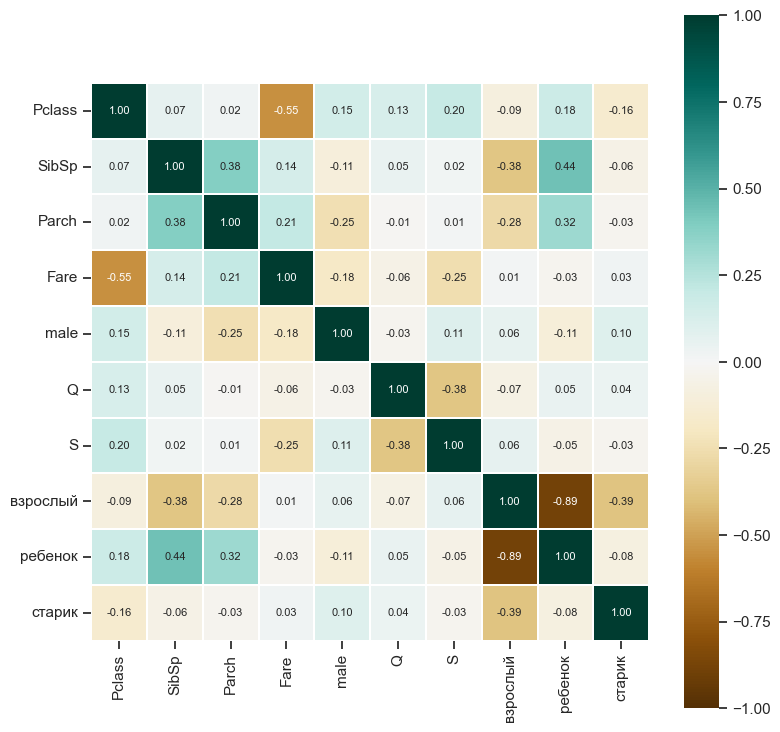

In [113]:
logistic = LogisticRegression(max_iter=500)

y = data.Survived
X = data.drop(["Survived"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
logistic.fit(X_train, y_train)

y_pred = logistic.predict(X_test)

print("\nПроизводительность модели:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(9,9), dpi=100)
corr_m = X.corr()
sns.heatmap(corr_m, vmin=-1, vmax=1, fmt='.2f',
            square=True, cmap="BrBG", linewidths=0.1, annot=True, annot_kws={"fontsize":8}) 
plt.show() 

#### Дополнительные задания

#### Проведем автоматизированный отбор признаков тремя методами:

1. Поочередное исключение признаков из модели. Начните с модели, включающей все признаки. Найдите признак, исключение которого приводит к наибольшему повышению эффективности модели. Затем по такому же принципу исключите второй признак, и так до тех пор, пока исключение признаков может повысить эффективность.


In [17]:
from sklearn.metrics import accuracy_score

y_t = training_set.Survived
X_t = training_set.drop(["Survived"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

initial_accuracy = accuracy_score(y_test, y_pred)

print(f"Эффективность модели на всех признаках: {initial_accuracy}")

num_features = X_t.shape[1]

for i in range(num_features):
    current_accuracy = accuracy_score(y_test, y_pred)
    best_feature = None
    best_accuracy = 0.0
    
    for feature in X_t.columns:
        X_temp = X_t.drop(feature, axis=1)
        X_train, X_test, y_train, y_test = train_test_split(X_temp, y_t, test_size=0.2, random_state=42)
        
        model.fit(X_train, y_train)
        y_pred_temp =model.predict(X_test)
        temp_accuracy = accuracy_score(y_test, y_pred_temp)
        
        if temp_accuracy > best_accuracy:
            best_accuracy = temp_accuracy
            best_feature = feature
            
    if best_accuracy > current_accuracy:
        X_t = X_t.drop(best_feature, axis=1)
        print(f"После удаления признака {best_feature} - эффективность модели равна: {best_accuracy}")

X_t.head()

Эффективность модели на всех признаках: 0.7972027972027972
После удаления признака Fare - эффективность модели равна: 0.8111888111888111
После удаления признака Parch - эффективность модели равна: 0.8111888111888111
После удаления признака Q - эффективность модели равна: 0.8111888111888111
После удаления признака S - эффективность модели равна: 0.8111888111888111


,Pclass,Age,SibSp,male
0,3,22.0,1,True
1,1,38.0,1,False
2,3,26.0,0,False
3,1,35.0,1,False
4,3,35.0,0,True



2. Поочередное включение признаков. Начните с парной модели с наибольшей эффективностью. Найдите второй признак, включение которого в модель дает наибольший прирост эффективности. Продолжайте добавлять признаки в модель по одному пока это приводит к росту эффективности.


In [31]:
y_t = training_set.Survived
X_t = training_set.drop(["Survived"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

initial_accuracy = accuracy_score(y_test, y_pred)
print(f"Эффективность модели на всех признаках: {initial_accuracy}")

num_features = X_t.shape[1]

best_pair_features = None
best_pair_accuracy = 0

for i in range(num_features - 1):
    for j in range(i + 1, num_features):
        pair_features = [X_t.columns[i], X_t.columns[j]]
        X_temp = X_t[pair_features]

        X_train, X_test, y_train, y_test = train_test_split(X_temp, y_t, test_size=0.2, random_state=42)
        model.fit(X_train, y_train)
        y_pred_temp = model.predict(X_test)
        temp_accuracy = accuracy_score(y_test, y_pred_temp)

        if temp_accuracy > best_pair_accuracy:
            best_pair_accuracy = temp_accuracy
            best_pair_features = pair_features

selected_features = best_pair_features
best_accuracy = best_pair_accuracy

print(f"Парная модель, состоящая из признаков: {selected_features} - с лучшей эффективностью, равной: {best_accuracy}\n")

while len(selected_features) < num_features:
    current_best_features = None
    current_best_accuracy = best_accuracy
    improve = False

    for feature in X_t.columns:
        if feature not in selected_features:
            features_to_try = selected_features + [feature]
            X_temp = X_t[features_to_try]

            X_train, X_test, y_train, y_test = train_test_split(X_temp, y_t, test_size=0.2, random_state=42)
            model.fit(X_train, y_train)
            y_pred_temp = model.predict(X_test)
            temp_accuracy = accuracy_score(y_test, y_pred_temp)

            if temp_accuracy >= current_best_accuracy:
                current_best_accuracy = temp_accuracy
                current_best_features = features_to_try
                improve = True
                
    if not improve:
        break
        
    if current_best_features:
        selected_features = current_best_features
        best_accuracy = current_best_accuracy
        print(f"Added features {current_best_features} - Model accuracy: {best_accuracy}")

X_t[selected_features].head()

Эффективность модели на всех признаках: 0.7972027972027972
Парная модель, состоящая из признаков: ['Fare', 'male'] - с лучшей эффективностью, равной: 0.7552447552447552

Added features ['Fare', 'male', 'Parch'] - Model accuracy: 0.7622377622377622
Added features ['Fare', 'male', 'Parch', 'Q'] - Model accuracy: 0.7622377622377622
Added features ['Fare', 'male', 'Parch', 'Q', 'S'] - Model accuracy: 0.7692307692307693


,Fare,male,Parch,Q,S
0,7.2500,True,0,False,True
1,71.2833,False,0,False,False
2,7.9250,False,0,False,True
3,53.1000,False,0,False,True
4,8.0500,True,0,False,True


3. Постройте вектор важности признаков. Опираясь на него включайте признаки в модель по одному в порядке уменьшения относительной важности. Найдите набор признаков, который дает наибольшую эффективность.


In [30]:
y_t = training_set.Survived
X_t = training_set.drop(["Survived"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Важность признаков и признаки соответственно
coefficients = model.coef_[0]
feature_coefficient_dict = dict(zip(X_train.columns, coefficients))

# Сортировка по убыванию
sorted_features = sorted(feature_coefficient_dict.items(), key=lambda x: abs(x[1]), reverse=True)

best_features = []
best_accuracy = 0

for feature, _ in sorted_features:
    current_features = best_features + [feature]
    
    X_temp = X_t[current_features]
    X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_temp, y_t, test_size=0.2, random_state=42)
    
    model.fit(X_train_temp, y_train_temp)
    y_pred_temp = model.predict(X_test_temp)
    temp_accuracy = accuracy_score(y_test_temp, y_pred_temp)

    if temp_accuracy < best_accuracy:
        break
    else:
        best_accuracy = temp_accuracy
        best_features = current_features
        print(best_features, best_accuracy)
    

print(f"\nВыбранные признаки: {best_features}")
print(f"Эффективность модели: {best_accuracy}")
print('Вектор важности признаков:')
X_t[best_features].head()

['male'] 0.7482517482517482
['male', 'Pclass'] 0.7482517482517482
['male', 'Pclass', 'Q'] 0.7482517482517482
['male', 'Pclass', 'Q', 'SibSp'] 0.7482517482517482
['male', 'Pclass', 'Q', 'SibSp', 'S'] 0.7552447552447552
['male', 'Pclass', 'Q', 'SibSp', 'S', 'Age'] 0.8111888111888111

Выбранные признаки: ['male', 'Pclass', 'Q', 'SibSp', 'S', 'Age']
Эффективность модели: 0.8111888111888111
Вектор важности признаков:


,male,Pclass,Q,SibSp,S,Age
0,True,3,False,1,True,22.0
1,False,1,False,1,False,38.0
2,False,3,False,0,True,26.0
3,False,1,False,1,True,35.0
4,True,3,False,0,True,35.0


### Контрольные вопросы

**1. Какие основные виды визуализации вы знаете? Какие у них области применения?**

Основные виды визуализации включают в себя:
   - Графики: Линейные графики, столбчатые диаграммы, круговые диаграммы и др. Они широко используются для отображения отношений и долей в данных.
   - Диаграммы рассеяния: Используются для отображения взаимосвязи между двумя или более переменными, особенно для исследования корреляции.
   - Гистограммы: Показывают распределение данных в интервалах. Используются для анализа распределения непрерывных переменных.
   - Ящиковые диаграммы (box plots): Отображают описательные статистики, такие как медиана, квартили, выбросы. Используются для сравнения распределений между разными категориями.
   - Тепловые карты (heatmaps): Показывают плотность и корреляции в матрице данных.
   - Линейные графики: Используются для визуализации изменения переменных со временем. <br>
 <br>

**2. Какие типы визуализации больше всего подходят для анализа совместного распределения двух непрерывных переменных?**

Для анализа совместного распределения двух непрерывных переменных подходят:
   - Диаграммы рассеяния (scatter plots).
   - Тепловые карты (heatmap).
   - Ящиковые диаграммы (box plots). <br>
<br>

**3. Какие типы визуализации больше всего подходят для анализа совместного распределения двух дискретных переменных?**

Для анализа совместного распределения двух дискретных переменных подходят:
   - Столбчатые диаграммы (bar charts).
   - Тепловые карты (heatmap) с подсчетом совпадений. <br>
<br>

**4. Как лучше всего построить совместное распределение дискретной и непрерывной переменной?** 

Для построения совместного распределения дискретной и непрерывной переменной можно использовать:
   - Столбчатые диаграммы для группировки непрерывной переменной по категориям дискретной переменной.
   - Ящиковые диаграммы (box plots) для отображения статистических метрик непрерывной переменной в каждой категории дискретной переменной. <br>
<br>

**5. Как лучше всего построить совместное распределение двух непрерывных и одной дискретной переменной?** 

Для построения совместного распределения двух непрерывных и одной дискретной переменной можно использовать:
   - Диаграммы рассеяния (scatter plots) с разделением по категориям дискретной переменной.
   - Тепловые карты (heatmap) для отображения корреляции между непрерывными переменными в разных категориях дискретной переменной. <br>
<br>

**6. Как лучше всего построить совместное распределение двух дискретных и одной непрерывной переменной?** 

Для построения совместного распределения двух дискретных и одной непрерывной переменной можно использовать:
   - Столбчатые диаграммы (bar charts) для визуализации непрерывной переменной в каждой категории дискретной переменной.
   - Ящиковые диаграммы (box plots) для отображения статистических метрик непрерывной переменной в каждой категории дискретной переменной.
<br>